In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
# import re

import seaborn as sns
import missingno as mso
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import data from github
df_train = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Spaceship/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Spaceship/test.csv')
df_check = pd.read_csv('https://raw.githubusercontent.com/QGdtsc/ML_data_and_models/main/Kaggle_competitions/Spaceship/sample_submission.csv')

In [3]:
print("Full train dataset shape is {}".format(df_train.shape))
df_train

Full train dataset shape is (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
# Explore dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: >

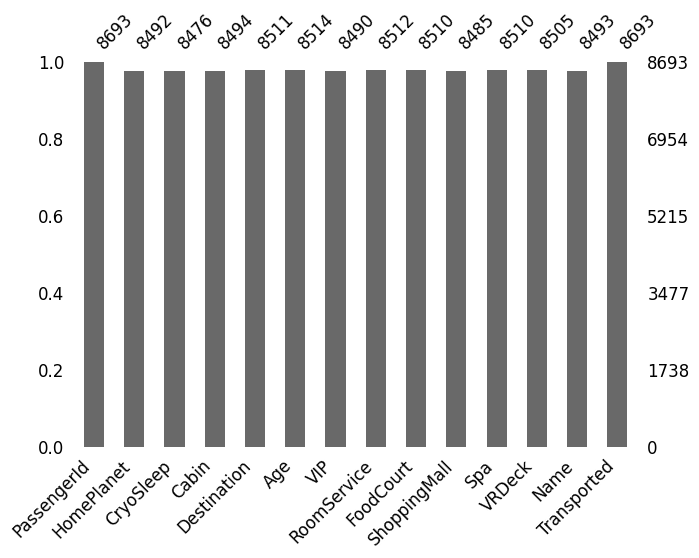

In [5]:
# Missing values in df_train
plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(df_train,ax=ax_train,fontsize = 12)

In [6]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
# Retraitement information colonne Cabin

# Remplacer les nan par l'élement le plus frequent (mode)
print('')
print('Remplacement par l element le plus frequent')

df_train['Cabin'].fillna(df_train['Cabin'].mode()[0], inplace=True)
print('List of unique values in column Cabin : ')
print(df_train['Cabin'].unique())
print('')
print(df_train['Cabin'].mode()[0])
print('')
print(df_train.info())


# df_train['Deck'] = re.split('r\/', df_train['Cabin'])[0]
# df_train['Deck'] = re.split('r\/', 'G/1499/S')[0]
# df_train["Deck"] = df_train["Cabin"].str.extract(r'^.*?(?=\/)')[0]
# df_train["Deck"] = df_train["Cabin"].str.extract(r"(\d{8})")
# df_train['Deck'] = re.findall(pattern='^.*?(?=\/)',string=df_train['Cabin'])[0]
df_train['Deck'] = df_train['Cabin'].str[:1]
df_train['Side'] = df_train['Cabin'].str[-1]
df_train[['Cabin','Deck','Side']]


Remplacement par l element le plus frequent
List of unique values in column Cabin : 
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

G/734/S

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory u

,Cabin,Deck,Side
0,B/0/P,B,P
1,F/0/S,F,S
2,A/0/S,A,S
3,A/0/S,A,S
4,F/1/S,F,S
...,...,...,...
8688,A/98/P,A,P
8689,G/1499/S,G,S
8690,G/1500/S,G,S
8691,E/608/S,E,S


In [8]:
# Separation en categorical_features et numerical_features
output_column = ['Transported']
y_train = df_train['Transported']

list_ignored_features = ['PassengerId', 'Cabin', 'Name','Transported']
list_numerical_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
list_categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

df_train.drop(columns = list_ignored_features, inplace=True, errors='ignore')
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,S


In [9]:
# Lister les valeurs uniques pour en verifier le nombre avant l'encodage des categorical_features
for col in list_categorical_features:
  print(f'List of unique values in column {col} : {df_train[col].unique()}')

# Remplacer les nan par l'élement le plus frequent (mode)
print('')
print('Remplacement par l element le plus frequent')
for col in list_categorical_features:
  df_train[col].fillna(df_train[col].mode()[0], inplace=True)
  print(f'List of unique values in column {col} : {df_train[col].unique()}')

List of unique values in column HomePlanet : ['Europa' 'Earth' 'Mars' nan]
List of unique values in column CryoSleep : [False True nan]
List of unique values in column Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
List of unique values in column VIP : [False True nan]
List of unique values in column Deck : ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
List of unique values in column Side : ['P' 'S']

Remplacement par l element le plus frequent
List of unique values in column HomePlanet : ['Europa' 'Earth' 'Mars']
List of unique values in column CryoSleep : [False  True]
List of unique values in column Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
List of unique values in column VIP : [False  True]
List of unique values in column Deck : ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
List of unique values in column Side : ['P' 'S']


In [10]:
# Remplacer les nan des numerical_features par la moyenne de la colonne (mean)

# Retraitement de la colonne Age
mean_Age = round(df_train['Age'].mean(), 0)
df_train['Age'] = df_train['Age'].fillna(mean_Age)
# df_test['Age'] = df_test['Age'].fillna(mean_Age)

# Retraitement de la colonne RoomService
mean_RoomService = round(df_train['RoomService'].mean(), 0)
df_train['RoomService'] = df_train['RoomService'].fillna(mean_RoomService)
# df_test['RoomServicege'] = df_test['RoomService'].fillna(mean_RoomService)

# Retraitement de la colonne FoodCourt
mean_FoodCourt = round(df_train['FoodCourt'].mean(), 0)
df_train['FoodCourt'] = df_train['FoodCourt'].fillna(mean_FoodCourt)
# df_test['FoodCourt'] = df_test['FoodCourt'].fillna(mean_FoodCourt)

# Retraitement de la colonne ShoppingMall
mean_ShoppingMall = round(df_train['ShoppingMall'].mean(), 0)
df_train['ShoppingMall'] = df_train['ShoppingMall'].fillna(mean_ShoppingMall)
# df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(mean_ShoppingMall)

# Retraitement de la colonne Spa
mean_Spa = round(df_train['Spa'].mean(), 0)
df_train['Spa'] = df_train['Spa'].fillna(mean_Spa)
# df_test['Spa'] = df_test['Spa'].fillna(mean_Spa)

# Retraitement de la colonne VRDeck
mean_VRDeck = round(df_train['VRDeck'].mean(), 0)
df_train['VRDeck'] = df_train['VRDeck'].fillna(mean_VRDeck)
# df_test['VRDeck'] = df_test['VRDeck'].fillna(mean_VRDeck)

In [11]:
# Encoder les categorical_features
# labelencoder = LabelEncoder()
# for col in list_categorical_features:
#   df_train[col] = labelencoder.fit_transform(df_train[col])
# df_train

label_encoder_true_false = LabelEncoder()
df_train['CryoSleep'] = label_encoder_true_false.fit_transform(df_train['CryoSleep'])
df_train['VIP'] = label_encoder_true_false.fit_transform(df_train['VIP'])

# y_train['Transported'] = label_encoder_true_false.fit_transform(y_train['Transported'])
y_train = label_encoder_true_false.fit_transform(y_train)

label_encoder_HomePlanet = LabelEncoder()
df_train['HomePlanet'] = label_encoder_HomePlanet.fit_transform(df_train['HomePlanet'])
label_encoder_Destination = LabelEncoder()
df_train['Destination'] = label_encoder_Destination.fit_transform(df_train['Destination'])
label_encoder_Deck = LabelEncoder()
df_train['Deck'] = label_encoder_Deck.fit_transform(df_train['Deck'])
label_encoder_Side = LabelEncoder()
df_train['Side'] = label_encoder_Side.fit_transform(df_train['Side'])

In [12]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,1


In [13]:
x_train = df_train

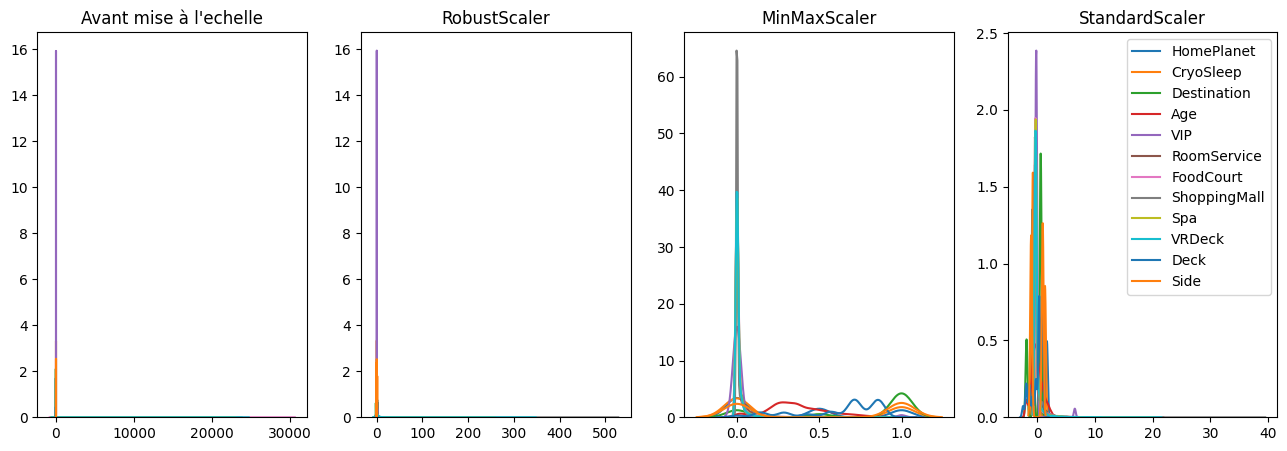

In [14]:
# Tester differents types de scaling

import seaborn as sns
def plotGraphAll(pdf, pscaled1, pscaled2, pscaled3):
    fig, (a, b, c, d) = plt.subplots(ncols=4, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("RobustScaler")
    for col in pscaled1.columns:
        sns.kdeplot(pscaled1[col], ax=b)
    c.set_title("MinMaxScaler")
    for col in pscaled2.columns:
        sns.kdeplot(pscaled2[col], ax=c)
    d.set_title("StandardScaler")
    for col in pscaled3.columns:
        sns.kdeplot(pscaled3[col], ax=d)

    list_columns = pdf.columns
    plt.legend(list_columns)
    a.set_xlabel("")
    a.set_ylabel("")
    b.set_xlabel("")
    b.set_ylabel("")
    c.set_xlabel("")
    c.set_ylabel("")
    d.set_xlabel("")
    d.set_ylabel("")

    plt.show()


input_features = list(df_train.columns)

scaler = RobustScaler()
scaled_df_train_1 = scaler.fit_transform(df_train[input_features])
scaled_df_train_1 = pd.DataFrame(scaled_df_train_1, columns=input_features)

scaler = MinMaxScaler()
scaled_df_train_2 = scaler.fit_transform(df_train[input_features])
scaled_df_train_2 = pd.DataFrame(scaled_df_train_2, columns=input_features)

scaler = StandardScaler()
scaled_df_train_3 = scaler.fit_transform(df_train[input_features])
scaled_df_train_3 = pd.DataFrame(scaled_df_train_3, columns=input_features)


plotGraphAll(df_train[input_features], scaled_df_train_1, scaled_df_train_2, scaled_df_train_3)

In [15]:
# Selection de MinMaxScaler pour un premier essai
sc = MinMaxScaler()
# sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [16]:
# creation de x_test (retraitement de df_test)

df_test['Cabin'].fillna(df_test['Cabin'].mode()[0], inplace=True)
df_test['Deck'] = df_test['Cabin'].str[:1]
df_test['Side'] = df_test['Cabin'].str[-1]

df_test.drop(columns = list_ignored_features, inplace=True, errors='ignore')

for col in list_categorical_features:
  df_test[col].fillna(df_test[col].mode()[0], inplace=True)

df_test['Age'] = df_test['Age'].fillna(mean_Age)
df_test['RoomService'] = df_test['RoomService'].fillna(mean_RoomService)
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(mean_FoodCourt)
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(mean_ShoppingMall)
df_test['Spa'] = df_test['Spa'].fillna(mean_Spa)
df_test['VRDeck'] = df_test['VRDeck'].fillna(mean_VRDeck)

df_test['CryoSleep'] = label_encoder_true_false.fit_transform(df_test['CryoSleep'])
df_test['VIP'] = label_encoder_true_false.fit_transform(df_test['VIP'])
df_test['HomePlanet'] = label_encoder_HomePlanet.fit_transform(df_test['HomePlanet'])
df_test['Destination'] = label_encoder_Destination.fit_transform(df_test['Destination'])
df_test['Deck'] = label_encoder_Deck.fit_transform(df_test['Deck'])
df_test['Side'] = label_encoder_Side.fit_transform(df_test['Side'])

x_test = df_test
x_test = sc.fit_transform(x_test)

x_test

array([[0.        , 1.        , 1.        , ..., 0.        , 0.85714286,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.71428571,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.28571429,
        1.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 0.        , 0.42857143,
        0.        ],
       [0.5       , 0.        , 1.        , ..., 0.0234824 , 0.42857143,
        0.        ],
       [0.        , 1.        , 0.5       , ..., 0.        , 0.85714286,
        1.        ]])

<Axes: >

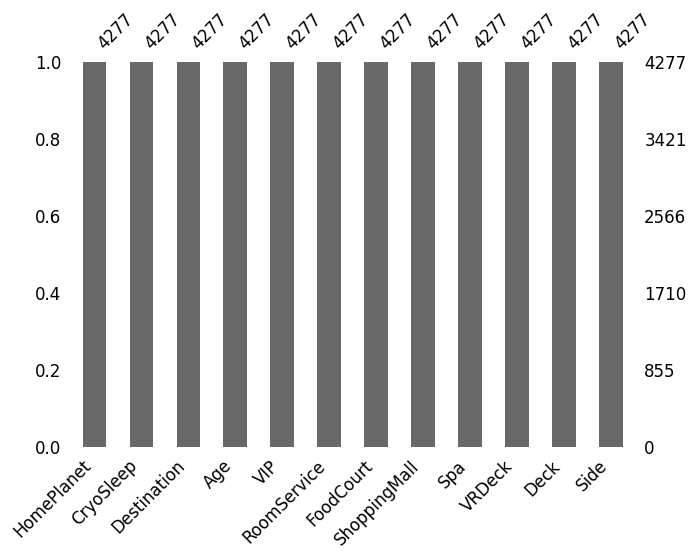

In [17]:
# Missing values in df_test
plt.figure(figsize=(16,5))
ax_test = plt.subplot(1,2,2)
mso.bar(df_test,ax=ax_test,fontsize = 12)

Epoch 1/100
464/464 [==============================] - 9s 10ms/step - loss: 0.6486 - accuracy: 0.6021 - val_loss: 0.5628 - val_accuracy: 0.7280
Epoch 2/100
464/464 [==============================] - 2s 4ms/step - loss: 0.5774 - accuracy: 0.7123 - val_loss: 0.5328 - val_accuracy: 0.7407
Epoch 3/100
464/464 [==============================] - 2s 4ms/step - loss: 0.5559 - accuracy: 0.7215 - val_loss: 0.5152 - val_accuracy: 0.7487
Epoch 4/100
464/464 [==============================] - 2s 4ms/step - loss: 0.5354 - accuracy: 0.7361 - val_loss: 0.4940 - val_accuracy: 0.7527
Epoch 5/100
464/464 [==============================] - 2s 4ms/step - loss: 0.5255 - accuracy: 0.7412 - val_loss: 0.4848 - val_accuracy: 0.7625
Epoch 6/100
464/464 [==============================] - 2s 4ms/step - loss: 0.5093 - accuracy: 0.7504 - val_loss: 0.4730 - val_accuracy: 0.7717
Epoch 7/100
464/464 [==============================] - 3s 6ms/step - loss: 0.4967 - accuracy: 0.7583 - val_loss: 0.4634 - val_accuracy: 0.776

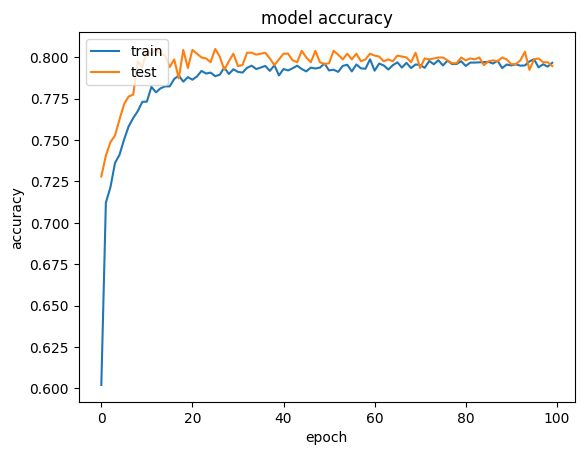

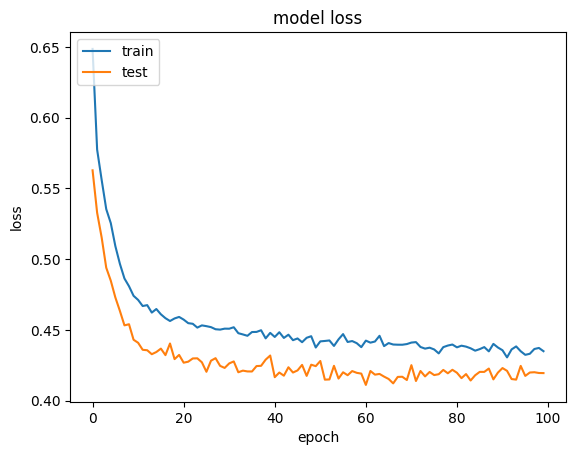

In [18]:
# Creation du modele
classifier_model = tf.keras.Sequential()

# #Input layer with 10 inputs neurons
# classifier_model.add(tf.keras.layers.Dense(6, activation = 'relu', input_dim = 12))
# # Hidden layers
# classifier_model.add(tf.keras.layers.Dropout(0.2))
# # classifier_model.add(tf.keras.layers.Dense(4, activation = 'relu'))
# # classifier_model.add(tf.keras.layers.Dropout(0.3))
# classifier_model.add(tf.keras.layers.Dense(2, activation = 'relu'))
# # Output layer with 1 output neuron which will predict 1 or 0
# classifier_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# #Input layer with 2 inputs neurons
# classifier_model.add(tf.keras.layers.Dense(6, activation = 'relu', input_dim = 12))
# # Hidden layers
# classifier_model.add(tf.keras.layers.Dropout(0.4))
# classifier_model.add(tf.keras.layers.Dense(3, activation = 'relu'))
# # classifier_model.add(tf.keras.layers.Dense(2, activation = 'relu'))
# # Output layer with 1 output neuron which will predict 1 or 0
# classifier_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Input layer with 12 inputs neurons
classifier_model.add(tf.keras.layers.Dense(32, activation = 'relu', input_dim = 12))
# Hidden layers
classifier_model.add(tf.keras.layers.Dropout(0.5))
classifier_model.add(tf.keras.layers.Dense(8, activation = 'relu'))
# # optional----------
# classifier_model.add(tf.keras.layers.Dropout(0.3))
# classifier_model.add(tf.keras.layers.Dense(4, activation = 'relu'))
# # optional----------
# Output layer with 1 output neuron which will predict 1 or 0
classifier_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compilation du modele
classifier_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Entrainement du modele
history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 15, epochs = 100)
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 20, epochs = 100)
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 64, epochs = 200)
# history = classifier_model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)
# history = classifier_model.fit(x_train, y_train, validation_split=0.33, batch_size = 20, epochs = 100)
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 20, epochs = 100)
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 10, epochs = 100, shuffle=True)
# history = classifier_model.fit(x_train, y_train, validation_split=0.2, batch_size = 30, epochs = 100, shuffle=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Tester le modele sur le dataframe de test

# Il faudra ajouter une etape inverse_transform en cas de nouvelles données non transformées par StandardScaler()



prediction = classifier_model.predict(x_test).tolist()
# print(prediction)
# list to series
se = pd.Series(prediction)



# creating new column of predictions in data_check dataframe
df_check['check'] = se
df_check['check'] = df_check['check'].str.get(0)


series = []
for val in df_check.check:
    if val >= 0.5:
        series.append(False)
    else:
        series.append(True)

# for val in df_check.check:
#     if val >= 0.5:
#         series.append(1)
#     else:
#         series.append(0)
df_check['final'] = series
print('')
print(df_check)



match = 0
nomatch = 0
for val in df_check.values:
    if val[1] == val[3]:
        match = match +1
    else:
        nomatch = nomatch +1
print('')
# print(match)
# print(nomatch)
print(f"Predictions correctes: {match} ({round(match/(match+nomatch)*100,2)}%)")
print(f"Predictions incorrectes: {nomatch}")

df_check

134/134 [==============================] - 0s 2ms/step

     PassengerId  Transported     check  final
0        0013_01        False  0.720940  False
1        0018_01        False  0.049000   True
2        0019_01        False  0.975756  False
3        0021_01        False  0.995543  False
4        0023_01        False  0.757982  False
...          ...          ...       ...    ...
4272     9266_02        False  0.728380  False
4273     9269_01        False  0.483819   True
4274     9271_01        False  0.943041  False
4275     9273_01        False  0.734762  False
4276     9277_01        False  0.738411  False

[4277 rows x 4 columns]

Predictions correctes: 2468 (57.7%)
Predictions incorrectes: 1809


,PassengerId,Transported,check,final
0,0013_01,False,0.720940,False
1,0018_01,False,0.049000,True
2,0019_01,False,0.975756,False
3,0021_01,False,0.995543,False
4,0023_01,False,0.757982,False
...,...,...,...,...
4272,9266_02,False,0.728380,False
4273,9269_01,False,0.483819,True
4274,9271_01,False,0.943041,False
4275,9273_01,False,0.734762,False
